Notebook initialization:

You need to run the next 3 cells!

In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

Esthetic definitions for the plots

In [2]:
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = [3.0,2.0]

Common settings for cosmological parameters and other CLASS parameters

In [3]:
common_settings = {
                   # LambdaCDM parameters
                   'h':0.67556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'sigma8': 0.831,
                   'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
}


# Halo model galaxy power spectra

In [6]:
%%time
M = Class()
M.set(common_settings)
M.set({
'output' : 'ngal_ngal_1h,ngal_ngal_2h',
'galaxy_samples_list_num' : 3, # the number of galaxy samples
'galaxy_samples_list' : '1,2,4', # the id string of each sample, can be any integer
'full_path_and_prefix_to_dndz_ngal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/WISC_bin3_ngal_example'
})
M.set({# class_sz parameters:

'mass function': 'T08M200c',
'concentration parameter' : 'D08',
'hm_consistency': 1,

'delta for galaxies' : '200c',

# HOD parameters
'sigma_log10M_HOD_ngal_0' : 0.69,
'alpha_s_HOD_ngal_0' :  1.30,
'M1_prime_HOD_ngal_0' : 5.03e12, # Msun/h
'M_min_HOD_ngal_0' : 6.25e11, # Msun/h
'M0_HOD_ngal_0' : 0,  # Msun/h
'x_out_truncated_nfw_profile_satellite_galaxies_ngal_0' : 1.09,    
'f_cen_HOD_ngal_0' : 1.,   
    
'sigma_log10M_HOD_ngal_1' : 0.79,
'alpha_s_HOD_ngal_1' :  1.30,
'M1_prime_HOD_ngal_1' : 5.43e12, # Msun/h
'M_min_HOD_ngal_1' : 6.15e11, # Msun/h
'M0_HOD_ngal_1' : 0,  # Msun/h
'x_out_truncated_nfw_profile_satellite_galaxies_ngal_1' : 1.19,  
'f_cen_HOD_ngal_1' : 1.,    
    
'sigma_log10M_HOD_ngal_2' : 0.49,
'alpha_s_HOD_ngal_2' :  1.70,
'M1_prime_HOD_ngal_2' : 6.03e12, # Msun/h
'M_min_HOD_ngal_2' : 7.25e11, # Msun/h
'M0_HOD_ngal_2' : 0,  # Msun/h
'x_out_truncated_nfw_profile_satellite_galaxies_ngal_2' : 0.89,  
'f_cen_HOD_ngal_2' : 1.,

'M0 equal M_min (HOD)'  : 'no',



'M_min' : 1e11*common_settings['h'],
'M_max' : 5e15*common_settings['h'],
'ndim_masses' : 100,
    
    
'z_min' : 0.,
'z_max' : 3.,
'ndim_redshifts' : 100,
    
    
'dlogell' : 0.3,
'ell_max' : 5000.0,
'ell_min' : 2.0,


    
# precisions params:
'non_linear' : 'halofit',
'k_min_for_pk_class_sz' :  0.001,
'k_max_for_pk_class_sz' :  60.0,
'k_per_decade_class_sz' :  50,
'P_k_max_h/Mpc' :  50.0,

    
'redshift_epsabs' : 1e-40,
'redshift_epsrel' : 0.0001,
'mass_epsabs' : 1e-40,
'mass_epsrel' : 0.0001    
    
        })
        
M.compute()
cl_ngal_ngal = M.cl_ngal_ngal()

CPU times: user 26.7 s, sys: 105 ms, total: 26.8 s
Wall time: 3.48 s


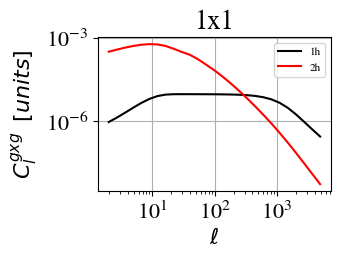

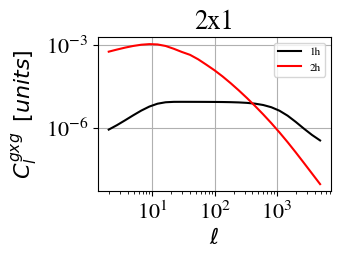

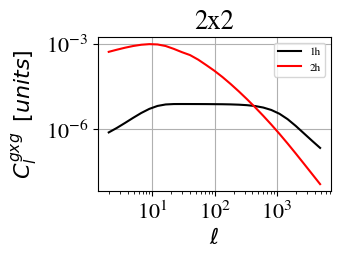

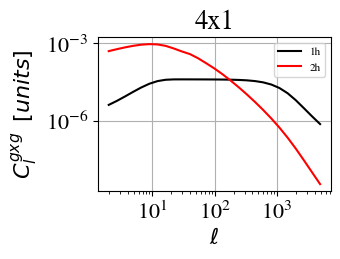

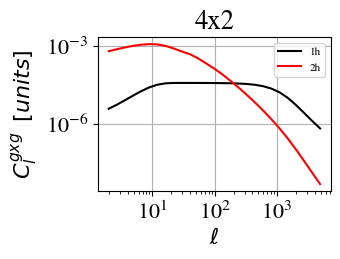

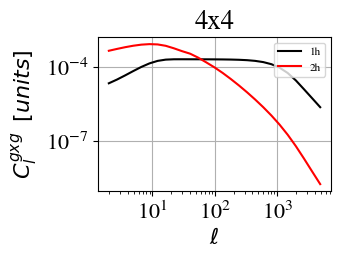

In [7]:
for kk in cl_ngal_ngal.keys():
    fig = plt.figure()
    plt.title(kk)
    plt.xlabel(r"$\ell$")
    plt.ylabel(r"$C_l^{gxg} \,\,\, [units]$")

    plt.grid()
    #
    cl = cl_ngal_ngal[kk]
    fac = np.asarray(cl['ell'])*(np.asarray(cl['ell'])+1.)/2./np.pi

    plt.loglog(cl['ell'],np.asarray(cl['1h'])/fac,'k-',label=r'1h')
    plt.loglog(cl['ell'],np.asarray(cl['2h'])/fac,'r-',label=r'2h')
    plt.legend(loc=1,fontsize=8)

# Halofit method for galaxy power spectra

In [8]:
%%time
M = Class()
M.set(common_settings)
M.set({
'output' : 'ngal_ngal_hf',
'galaxy_samples_list_num' : 3, # the number of galaxy samples
'galaxy_samples_list' : '1,2,4', # the id string of each sample, can be any integer
'full_path_and_prefix_to_dndz_ngal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/WISC_bin3_ngal_example'
})
M.set({# class_sz parameters:
    
'z_min' : 0.,
'z_max' : 3.,
'ndim_redshifts' : 100,
    

'effective_galaxy_bias_ngal_0' : 1.3,
'effective_galaxy_bias_ngal_1' : 1.7,
'effective_galaxy_bias_ngal_2' : 2.7,
   
    

'dlogell' : 0.3,
'ell_max' : 5000.0,
'ell_min' : 2.0,

# primordial non-Gaussianity:
'use scale dependent bias (from non Gaussianity)': 1,
'fNL' : 1e-1,
    
# precisions params:
'non_linear' : 'halofit',
'k_min_for_pk_class_sz' :  0.001,
'k_max_for_pk_class_sz' :  60.0,
'k_per_decade_class_sz' :  50,
'P_k_max_h/Mpc' :  50.0,

    
'redshift_epsabs' : 1e-40,
'redshift_epsrel' : 0.0001,


    
        })
        
M.compute()
cl_ngal_ngal = M.cl_ngal_ngal()

CPU times: user 4.82 s, sys: 26.7 ms, total: 4.85 s
Wall time: 910 ms


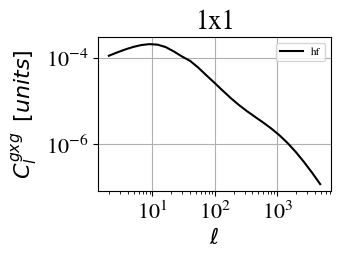

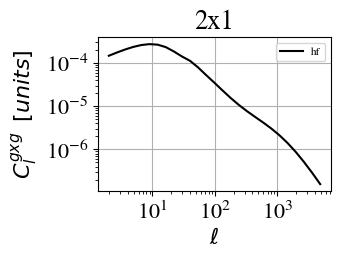

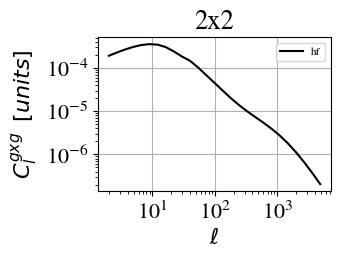

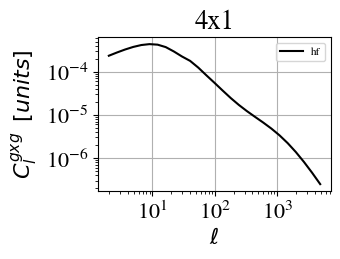

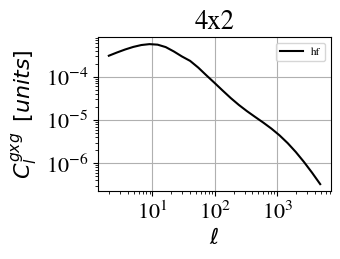

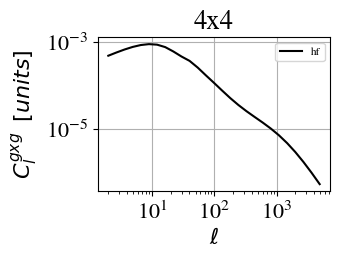

In [9]:
for kk in cl_ngal_ngal.keys():
    fig = plt.figure()
    plt.title(kk)
    plt.xlabel(r"$\ell$")
    plt.ylabel(r"$C_l^{gxg} \,\,\, [units]$")

    plt.grid()
    #
    cl = cl_ngal_ngal[kk]
    fac = np.asarray(cl['ell'])*(np.asarray(cl['ell'])+1.)/2./np.pi

    plt.loglog(cl['ell'],np.asarray(cl['hf'])/fac,'k-',label=r'hf')
    plt.legend(loc=1,fontsize=8)